In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [8]:
df = pd.read_csv('buyComputer.csv')
df

,agelevel,income,student,credit,BuyComputer
0,young,high,no,fair,no
1,young,high,no,excellent,no
2,middle,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle,low,yes,excellent,yes
7,young,medium,no,fair,no
8,young,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [9]:
BuyComputerX = df[['agelevel', 'income','student','credit']]
BuyComputerX

,agelevel,income,student,credit
0,young,high,no,fair
1,young,high,no,excellent
2,middle,high,no,fair
3,senior,medium,no,fair
4,senior,low,yes,fair
5,senior,low,yes,excellent
6,middle,low,yes,excellent
7,young,medium,no,fair
8,young,low,yes,fair
9,senior,medium,yes,fair


In [10]:
# Mapping the data
BuyComputerX['student'] = (BuyComputerX['student'] == 'yes').astype('int')

BuyComputerX['credit'] = (BuyComputerX['credit'] == 'excellent').astype('int')

label1 = BuyComputerX['agelevel'].unique().tolist()
BuyComputerX['agelevel'] = BuyComputerX['agelevel'].apply(lambda n: label1.index(n))   
label2 = BuyComputerX['income'].unique().tolist()
BuyComputerX['income'] = BuyComputerX['income'].apply(lambda n: label2.index(n))
BuyComputerX    


/var/folders/lb/gtypp3yn68d4d9gxqz5r5g6r0000gn/T/ipykernel_12354/2978386760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BuyComputerX['student'] = (BuyComputerX['student'] == 'yes').astype('int')
/var/folders/lb/gtypp3yn68d4d9gxqz5r5g6r0000gn/T/ipykernel_12354/2978386760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BuyComputerX['credit'] = (BuyComputerX['credit'] == 'excellent').astype('int')
/var/folders/lb/gtypp3yn68d4d9gxqz5r5g6r0000gn/T/ipykernel_12354/2978386760.py:7: SettingWithCopyWarni

,agelevel,income,student,credit
0,0,0,0,0
1,0,0,0,1
2,1,0,0,0
3,2,1,0,0
4,2,2,1,0
5,2,2,1,1
6,1,2,1,1
7,0,1,0,0
8,0,2,1,0
9,2,1,1,0


In [11]:
BuyComputerY = df[['BuyComputer']]
BuyComputerY['BuyComputer'] = (BuyComputerY['BuyComputer'] == 'yes').astype('int')
BuyComputerY

/var/folders/lb/gtypp3yn68d4d9gxqz5r5g6r0000gn/T/ipykernel_12354/1777736056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BuyComputerY['BuyComputer'] = (BuyComputerY['BuyComputer'] == 'yes').astype('int')


,BuyComputer
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'gini', max_depth=2)
clf.fit(BuyComputerX, BuyComputerY)
train_score = clf.score(BuyComputerX, BuyComputerY)
print(train_score)

0.8571428571428571


In [13]:
y_pred = clf.predict(BuyComputerX)
from sklearn import metrics
mycm = metrics.confusion_matrix(BuyComputerY, y_pred)
print('Confusion Matrix: \n', mycm)

Confusion Matrix: 
 [[3 2]
 [0 9]]


/Users/kiuy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


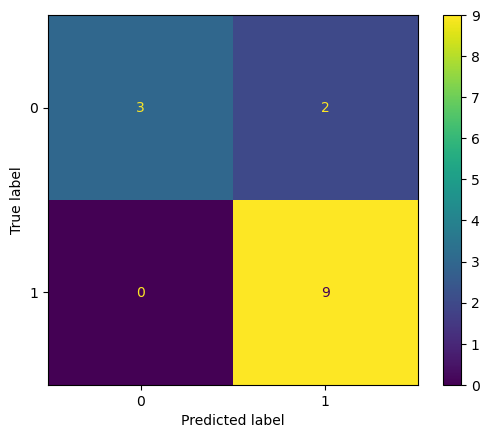

In [14]:
metrics.plot_confusion_matrix(clf,BuyComputerX,BuyComputerY)

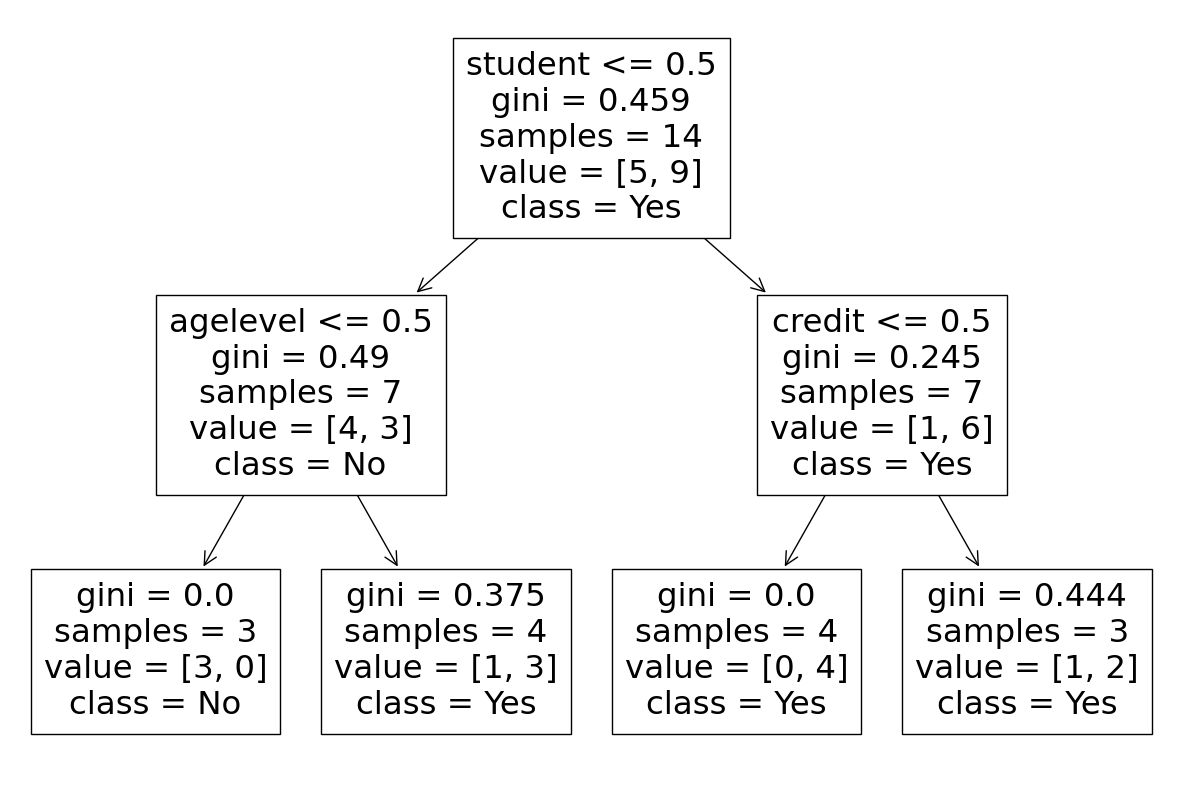

In [15]:
# plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
A=['No', 'Yes']
F=['agelevel','income','student','credit']
plot_tree(clf, feature_names=F, class_names=A)

plt.show()